# Import Data Processing and Visualization Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

import warnings
warnings.simplefilter(action='ignore')

# Import Data

In [2]:
df = pd.read_excel('Data1.xlsx')

In [3]:
df

,ID_Nasabah,Jenis_Kelamin,Status_Pernikahan,Jumlah_Tanggungan,Pendidikan,Wiraswasta,Penghasilan,Penghasilan_Pasangan,Total_Utang,Waktu_Cicilan_Pinjaman(bulan),Histori_Peminjaman_Uang,Area_Tempat_Tinggal,Status_Pengajuan_Kredit
0,LP001002,Pria,Belum Menikah,0,Sarjana,Tidak,5849000,0.0,5600000,36.0,1.0,Perkotaan,Ya
1,LP001003,Pria,Menikah,1,Sarjana,Tidak,4583000,1508000.0,1280000,36.0,1.0,Pedesaan,Tidak
2,LP001005,Pria,Menikah,0,Sarjana,Ya,3000000,0.0,660000,6.6,1.0,Perkotaan,Ya
3,LP001006,Pria,Menikah,0,Tidak Sarjana,Tidak,2583000,2358000.0,1200000,36.0,1.0,Perkotaan,Ya
4,LP001008,Pria,Belum Menikah,0,Sarjana,Tidak,6000000,0.0,1410000,36.0,1.0,Perkotaan,Ya
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Wanita,Belum Menikah,0,Sarjana,Tidak,2900000,0.0,710000,36.0,1.0,Pedesaan,Ya
610,LP002979,Pria,Menikah,3+,Sarjana,Tidak,4106000,0.0,400000,18.0,1.0,Pedesaan,Ya
611,LP002983,Pria,Menikah,1,Sarjana,Tidak,8072000,240000.0,2530000,36.0,1.0,Perkotaan,Ya
612,LP002984,Pria,Menikah,2,Sarjana,Tidak,7583000,0.0,1870000,36.0,1.0,Perkotaan,Ya


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID_Nasabah                     614 non-null    object 
 1   Jenis_Kelamin                  601 non-null    object 
 2   Status_Pernikahan              611 non-null    object 
 3   Jumlah_Tanggungan              599 non-null    object 
 4   Pendidikan                     614 non-null    object 
 5   Wiraswasta                     582 non-null    object 
 6   Penghasilan                    614 non-null    int64  
 7   Penghasilan_Pasangan           614 non-null    float64
 8   Total_Utang                    614 non-null    int64  
 9   Waktu_Cicilan_Pinjaman(bulan)  614 non-null    float64
 10  Histori_Peminjaman_Uang        564 non-null    float64
 11  Area_Tempat_Tinggal            614 non-null    object 
 12  Status_Pengajuan_Kredit        614 non-null    obj

# Data Cleaning

### Remove Unnecessary Column

Dalam hal ini saya membuang data Jumlah_Tanggungan karena ada data yang ambigu atau tidak pasti, yaitu 3+ yang artinya Jumlah_Tanggungan dari setiap nasabah yang bernilai 3+ belum tentu bernilai tepat 3

In [5]:
df1 = df[['Jenis_Kelamin','Status_Pernikahan','Pendidikan','Wiraswasta','Penghasilan','Penghasilan_Pasangan','Total_Utang','Waktu_Cicilan_Pinjaman(bulan)','Histori_Peminjaman_Uang','Status_Pengajuan_Kredit']]

In [6]:
df1

,Jenis_Kelamin,Status_Pernikahan,Pendidikan,Wiraswasta,Penghasilan,Penghasilan_Pasangan,Total_Utang,Waktu_Cicilan_Pinjaman(bulan),Histori_Peminjaman_Uang,Status_Pengajuan_Kredit
0,Pria,Belum Menikah,Sarjana,Tidak,5849000,0.0,5600000,36.0,1.0,Ya
1,Pria,Menikah,Sarjana,Tidak,4583000,1508000.0,1280000,36.0,1.0,Tidak
2,Pria,Menikah,Sarjana,Ya,3000000,0.0,660000,6.6,1.0,Ya
3,Pria,Menikah,Tidak Sarjana,Tidak,2583000,2358000.0,1200000,36.0,1.0,Ya
4,Pria,Belum Menikah,Sarjana,Tidak,6000000,0.0,1410000,36.0,1.0,Ya
...,...,...,...,...,...,...,...,...,...,...
609,Wanita,Belum Menikah,Sarjana,Tidak,2900000,0.0,710000,36.0,1.0,Ya
610,Pria,Menikah,Sarjana,Tidak,4106000,0.0,400000,18.0,1.0,Ya
611,Pria,Menikah,Sarjana,Tidak,8072000,240000.0,2530000,36.0,1.0,Ya
612,Pria,Menikah,Sarjana,Tidak,7583000,0.0,1870000,36.0,1.0,Ya


### Remove Missing Values

In [7]:
df1.isna().sum()

Jenis_Kelamin                    13
Status_Pernikahan                 3
Pendidikan                        0
Wiraswasta                       32
Penghasilan                       0
Penghasilan_Pasangan              0
Total_Utang                       0
Waktu_Cicilan_Pinjaman(bulan)     0
Histori_Peminjaman_Uang          50
Status_Pengajuan_Kredit           0
dtype: int64

Dari data di atas dapat dilihat terdapat missing values pada beberapa kolom, sehingga perlu di hapus

In [8]:
df1.dropna(inplace=True)

In [9]:
df1

,Jenis_Kelamin,Status_Pernikahan,Pendidikan,Wiraswasta,Penghasilan,Penghasilan_Pasangan,Total_Utang,Waktu_Cicilan_Pinjaman(bulan),Histori_Peminjaman_Uang,Status_Pengajuan_Kredit
0,Pria,Belum Menikah,Sarjana,Tidak,5849000,0.0,5600000,36.0,1.0,Ya
1,Pria,Menikah,Sarjana,Tidak,4583000,1508000.0,1280000,36.0,1.0,Tidak
2,Pria,Menikah,Sarjana,Ya,3000000,0.0,660000,6.6,1.0,Ya
3,Pria,Menikah,Tidak Sarjana,Tidak,2583000,2358000.0,1200000,36.0,1.0,Ya
4,Pria,Belum Menikah,Sarjana,Tidak,6000000,0.0,1410000,36.0,1.0,Ya
...,...,...,...,...,...,...,...,...,...,...
609,Wanita,Belum Menikah,Sarjana,Tidak,2900000,0.0,710000,36.0,1.0,Ya
610,Pria,Menikah,Sarjana,Tidak,4106000,0.0,400000,18.0,1.0,Ya
611,Pria,Menikah,Sarjana,Tidak,8072000,240000.0,2530000,36.0,1.0,Ya
612,Pria,Menikah,Sarjana,Tidak,7583000,0.0,1870000,36.0,1.0,Ya


## Exploratory Data Analysis (EDA)

In [10]:
df1.describe()

,Penghasilan,Penghasilan_Pasangan,Total_Utang,Waktu_Cicilan_Pinjaman(bulan),Histori_Peminjaman_Uang
count,5.230000e+02,5.230000e+02,5.230000e+02,523.000000,523.000000
mean,5.299533e+06,1.555581e+06,1.392467e+06,33.321224,0.837476
std,5.513956e+06,2.540109e+06,8.416513e+05,8.418211,0.369284
min,1.500000e+05,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2.892000e+06,0.000000e+00,9.750000e+05,36.000000,1.000000
50%,3.858000e+06,1.086000e+06,1.250000e+06,36.000000,1.000000
75%,5.816500e+06,2.253500e+06,1.650000e+06,36.000000,1.000000
max,8.100000e+07,3.383700e+07,6.000000e+06,48.000000,1.000000


In [11]:
df1.groupby('Status_Pengajuan_Kredit').count()

,Jenis_Kelamin,Status_Pernikahan,Pendidikan,Wiraswasta,Penghasilan,Penghasilan_Pasangan,Total_Utang,Waktu_Cicilan_Pinjaman(bulan),Histori_Peminjaman_Uang
Status_Pengajuan_Kredit,,,,,,,,,
Tidak,170,170,170,170,170,170,170,170,170
Ya,353,353,353,353,353,353,353,353,353


In [12]:
df1.groupby('Status_Pengajuan_Kredit').mean()

,Penghasilan,Penghasilan_Pasangan,Total_Utang,Waktu_Cicilan_Pinjaman(bulan),Histori_Peminjaman_Uang
Status_Pengajuan_Kredit,,,,,
Tidak,5.595724e+06,1.686082e+06,1.421765e+06,33.091765,0.541176
Ya,5.156892e+06,1.492733e+06,1.378357e+06,33.431728,0.980170


In [13]:
df1.groupby('Status_Pengajuan_Kredit').median()

,Penghasilan,Penghasilan_Pasangan,Total_Utang,Waktu_Cicilan_Pinjaman(bulan),Histori_Peminjaman_Uang
Status_Pengajuan_Kredit,,,,,
Tidak,3871000.0,0.0,1235000.0,36.0,1.0
Ya,3850000.0,1213000.0,1250000.0,36.0,1.0


In [14]:
df1.groupby('Status_Pengajuan_Kredit').std()

,Penghasilan,Penghasilan_Pasangan,Total_Utang,Waktu_Cicilan_Pinjaman(bulan),Histori_Peminjaman_Uang
Status_Pengajuan_Kredit,,,,,
Tidak,7.190484e+06,3.460314e+06,921047.354012,9.532085,0.499774
Ya,4.494575e+06,1.951228e+06,801612.449977,7.837752,0.139614


## Data Visualization

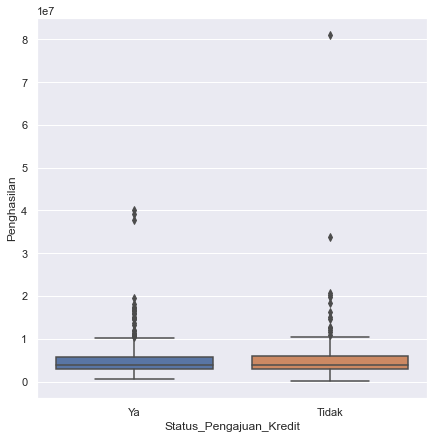

In [15]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(data=df1, x='Status_Pengajuan_Kredit', y='Penghasilan')
plt.show()

Dari boxplot di atas dapat dilihat bahwa distribusi untuk status pengajuan kredit tidak dan ya terhadap penghasilan termasuk skew to the right.

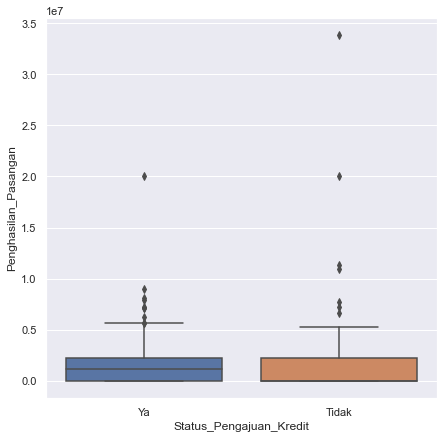

In [16]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(data=df1, x='Status_Pengajuan_Kredit', y='Penghasilan_Pasangan')
plt.show()

Dari boxplot di atas dapat dilihat bahwa distribusi untuk status pengajuan kredit tidak dan ya terhadap penghasilan pasangan termasuk skew to the right.

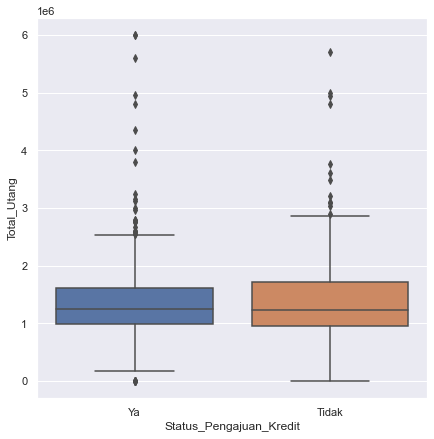

In [17]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(data=df1, x='Status_Pengajuan_Kredit', y='Total_Utang')
plt.show()

Dari boxplot di atas dapat dilihat bahwa distribusi untuk status pengajuan kredit tidak dan ya terhadap total utang termasuk skew to the right.

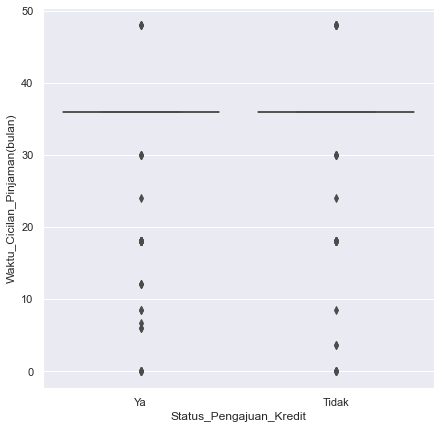

In [18]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(data=df1, x='Status_Pengajuan_Kredit', y='Waktu_Cicilan_Pinjaman(bulan)')
plt.show()

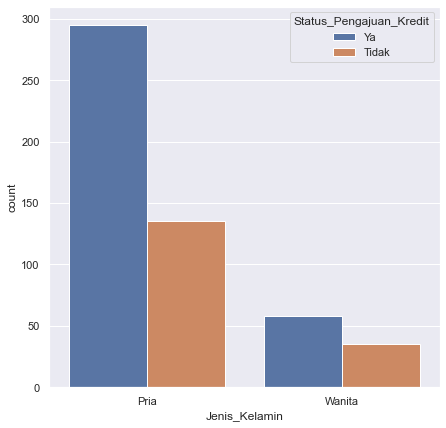

In [19]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.countplot(data=df1, x='Jenis_Kelamin', hue='Status_Pengajuan_Kredit')
plt.show()

Dari bar chart di atas dapat dilihat bahwa baik dari nasabah pria dan wanita lebih banyak yang mengajukan kredit daripada tidak

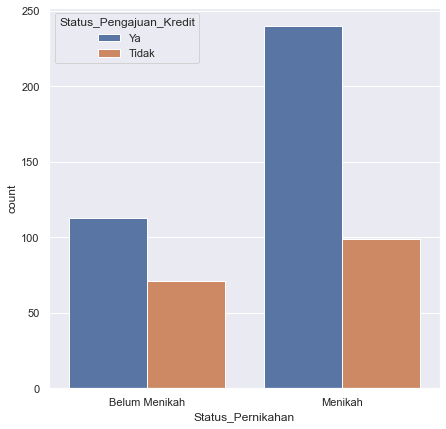

In [20]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.countplot(data=df1, x='Status_Pernikahan', hue='Status_Pengajuan_Kredit')
plt.show()

Dari bar chart di atas dapat dilihat bahwa baik dari nasabah yang sudah menikah dan belum menikah banyak yang mengajukan kredit daripada tidak

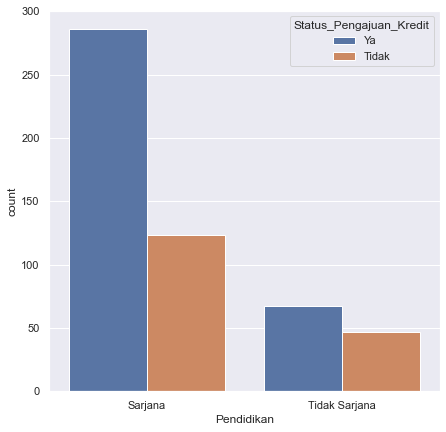

In [21]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.countplot(data=df1, x='Pendidikan', hue='Status_Pengajuan_Kredit')
plt.show()

Dari bar chart di atas dapat dilihat bahwa kelompok nasabah yang berpendidikan sarjana lebih banyak mengajukan kredit daripada yang tidak memiliki gelar sarjana

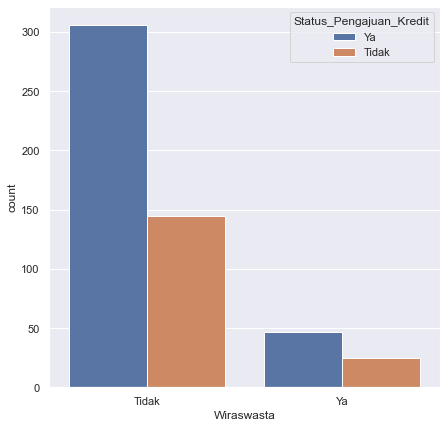

In [22]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.countplot(data=df1, x='Wiraswasta', hue='Status_Pengajuan_Kredit')
plt.show()

Dari bar chart di atas dapat dilihat bahwa nasabah yang tidak bekerja sebagai wiraswasta lebih banyak yang mengajukan kredit daripada yang bekerja sebagai wiraswaswta

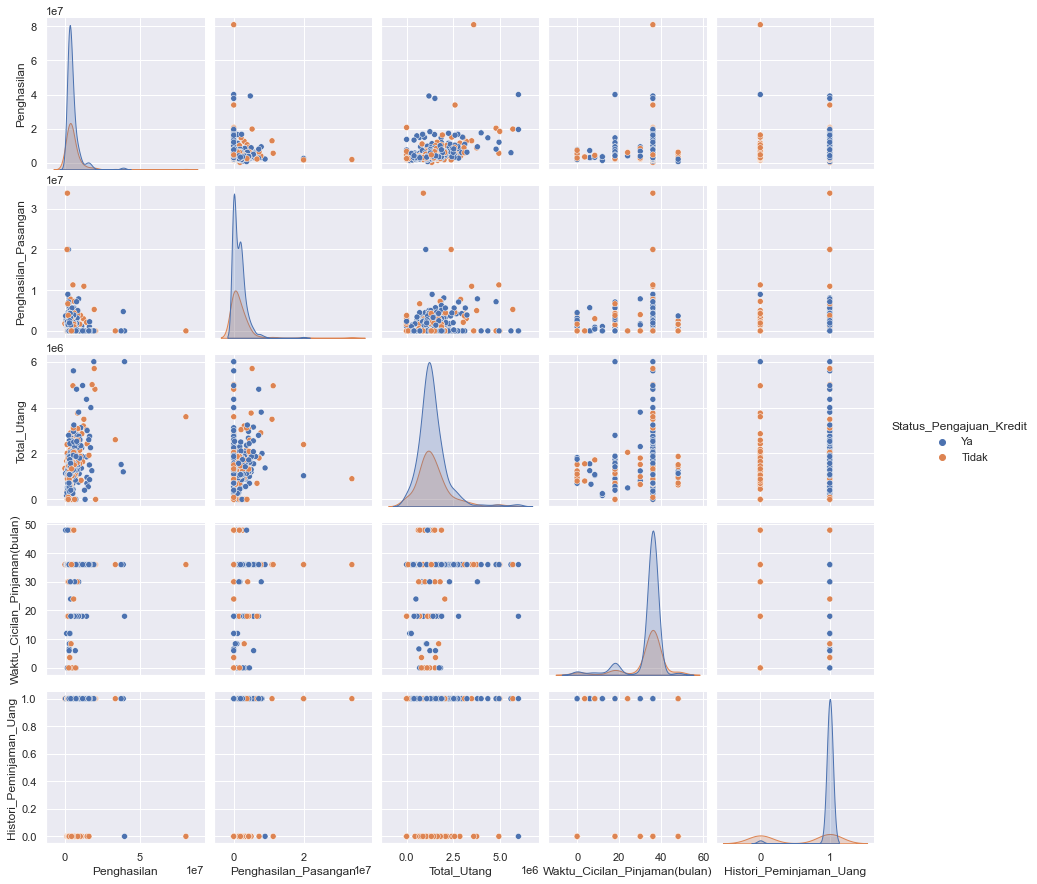

In [23]:
sns.pairplot(data=df1, hue='Status_Pengajuan_Kredit')
plt.show()

In [24]:
df1.corr()

,Penghasilan,Penghasilan_Pasangan,Total_Utang,Waktu_Cicilan_Pinjaman(bulan),Histori_Peminjaman_Uang
Penghasilan,1.000000,-0.114236,0.455145,0.017147,-0.038277
Penghasilan_Pasangan,-0.114236,1.000000,0.179496,-0.004046,0.001980
Total_Utang,0.455145,0.179496,1.000000,0.071457,-0.011282
Waktu_Cicilan_Pinjaman(bulan),0.017147,-0.004046,0.071457,1.000000,0.085228
Histori_Peminjaman_Uang,-0.038277,0.001980,-0.011282,0.085228,1.000000


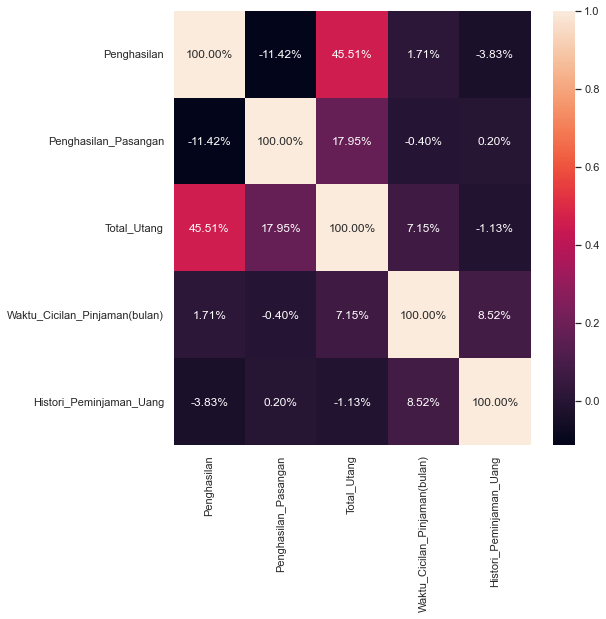

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df1.corr(), annot=True, fmt='.2%')
plt.show()

# Modelling

Replace the categorical variables to numerical:

- Jenis_Kelamin: Pria=0, Wanita=1
- Status_Pernikahan: Belum Menikah =0, Menikah=1
- Pendidikan: Tidak Sarjana = 0, Sarjana=1
- Wiraswasta: Tidak =0, Ya=1
- Status_Pengajuan_Kredit: Tidak =0, Ya=1

In [26]:
df1 = df1.copy()

replacements = {'Jenis_Kelamin': {'Pria': 0, 'Wanita': 1}, 
                'Status_Pernikahan': {'Belum Menikah': 0, 'Menikah': 1},
                'Pendidikan': {'Tidak Sarjana': 0, 'Sarjana': 1}, 
                'Wiraswasta': {'Tidak': 0, 'Ya': 1}, 
                'Status_Pengajuan_Kredit': {'Tidak': 0, 'Ya': 1}}

df1.replace(replacements, inplace=True)
df1.head()

,Jenis_Kelamin,Status_Pernikahan,Pendidikan,Wiraswasta,Penghasilan,Penghasilan_Pasangan,Total_Utang,Waktu_Cicilan_Pinjaman(bulan),Histori_Peminjaman_Uang,Status_Pengajuan_Kredit
0,0,0,1,0,5849000,0.0,5600000,36.0,1.0,1
1,0,1,1,0,4583000,1508000.0,1280000,36.0,1.0,0
2,0,1,1,1,3000000,0.0,660000,6.6,1.0,1
3,0,1,0,0,2583000,2358000.0,1200000,36.0,1.0,1
4,0,0,1,0,6000000,0.0,1410000,36.0,1.0,1


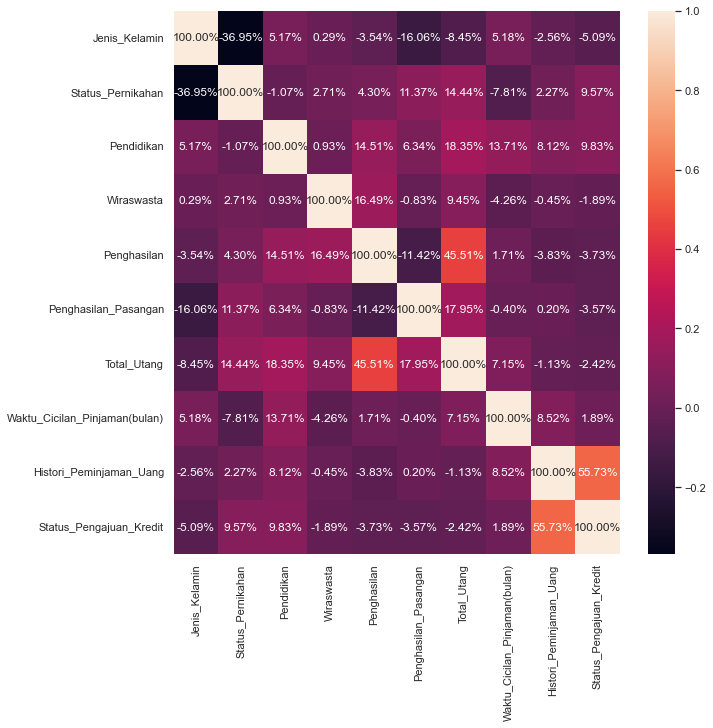

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df1.corr(), annot=True, fmt='.2%')
plt.show()

Split the dataframe into training and testing data. test_size= 0.2 means the data will be splitted with the composition 80% training data and 20% testing data. Random_state = 11 is used for a reproducible dataset. It can be passed by any integer.

In [28]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df1, test_size=0.25, random_state=11)
train_index = train.index
test_index = test.index

In [29]:
import statsmodels.api as sm

y_train = train['Status_Pengajuan_Kredit']
X_train = train[['Jenis_Kelamin','Status_Pernikahan','Pendidikan','Wiraswasta','Penghasilan','Penghasilan_Pasangan','Total_Utang','Waktu_Cicilan_Pinjaman(bulan)','Histori_Peminjaman_Uang']]
X_train = sm.add_constant(X_train)

model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
logreg = model.fit()

Use binomial as we have only two categoreis in the target data: Ya (1) atau Tidak (0)

In [30]:
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     Status_Pengajuan_Kredit   No. Observations:                  392
Model:                                 GLM   Df Residuals:                      382
Model Family:                     Binomial   Df Model:                            9
Link Function:                       logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -184.75
Date:                     Wed, 11 May 2022   Deviance:                       369.51
Time:                             16:55:04   Pearson chi2:                     399.
No. Iterations:                          5                                         
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -2.1649      0.732     -2.956      0.003      -3.600      -0.729
Jenis_Kelamin                     0.2610      0.372      0.701      0.483      -0.469       0.991
Status_Pernikahan                 0.4827      0.283      1.707      0.088      -0.071       1.037
Pendidikan                        0.6652      0.313      2.124      0.034       0.051       1.279
Wiraswasta                       -0.2436      0.377     -0.647      0.518      -0.982       0.494
Penghasilan                   -1.298e-08   3.13e-08     -0.415      0.678   -7.43e-08    4.84e-08
Penghasilan_Pasangan          -4.436e-08   4.24e-08     -1.046      0.295   -1.27e-07    3.87e-08
Total_Utang                   -1.459e-07    1.7e-07     -0.856      0.392    -4.8e-07    1.88e-07
Waktu_Cicilan_Pinjaman(bulan)    -0.0189      0.017     -1.105      0.269      -0.052       0.015
Histori_Peminjaman_Uang           3.6470      0.462      7.895      0.000       2.742       4.552
=================================================================================================
"""

Logistic Regression equation 

log(p/(1-p)) = -2.1649 + 0.2610X1 + 0.4827X2 + 0.6652X3 + (-0.2436)X4 + (-1.298e-08)X5 + (-4.436e-08)X6 + (-1.459e-07)X7 + (-0.0189)X8 + 3.6470X9

Keterangan:

- X1: Jenis_Kelamin
- X2: Status_Pernikahan
- X3: Pendidikan
- X4: Wiraswasta
- X5: Penghasilan
- X6: Penghasilan_Pasangan
- X7: Total_Utang
- X8: Waktu_Cicilan_Pinjaman(bulan)
- X9: Histori_Peminjaman_Uang

# Prediction

## Prediction of Training Data

In [31]:
train_pred = logreg.predict(X_train)

In [32]:
train['Yes_Or_No_Rate'] = train_pred
train.head()

,Jenis_Kelamin,Status_Pernikahan,Pendidikan,Wiraswasta,Penghasilan,Penghasilan_Pasangan,Total_Utang,Waktu_Cicilan_Pinjaman(bulan),Histori_Peminjaman_Uang,Status_Pengajuan_Kredit,Yes_Or_No_Rate
515,0,1,1,0,3466000,3428000.0,1500000,36.0,1.0,1,0.822511
105,0,1,1,0,3052000,1030000.0,1000000,36.0,1.0,1,0.847892
108,0,1,1,0,3800000,3600000.0,2160000,36.0,0.0,0,0.097807
38,0,0,1,0,4166000,7210000.0,1840000,36.0,1.0,1,0.695147
162,0,1,1,0,3089000,1280000.0,1210000,36.0,0.0,0,0.122274


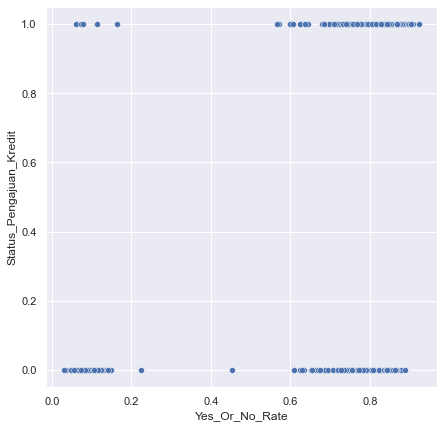

In [33]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(data=train, x='Yes_Or_No_Rate', y='Status_Pengajuan_Kredit')
plt.show()

#### Cut Off

In [34]:
170/(170+353)

0.32504780114722753

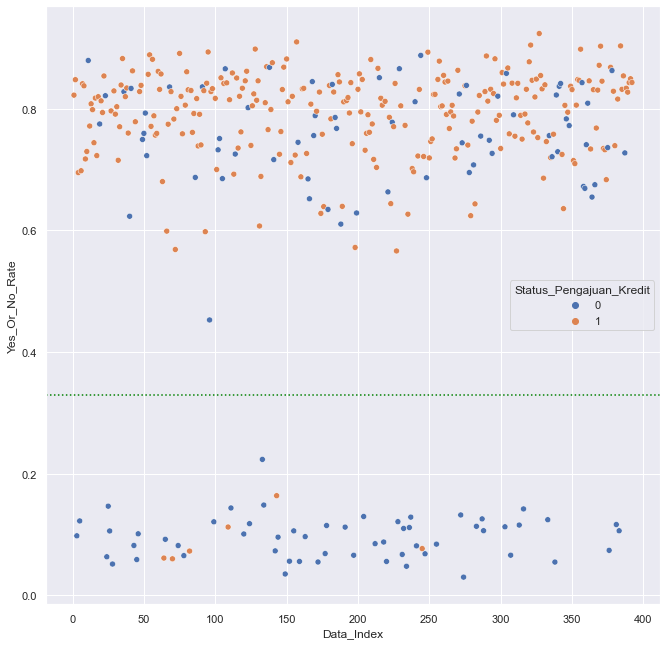

In [35]:
fig, ax = plt.subplots(figsize=(11, 11))
train['Data_Index'] = range(1, len(train) + 1)
sns.scatterplot(data=train, x='Data_Index', y='Yes_Or_No_Rate', hue='Status_Pengajuan_Kredit')
plt.axhline(y = 0.33, color ='green', linestyle =':')
plt.show()

In [36]:
train[['Status_Pengajuan_Kredit', 'Yes_Or_No_Rate']].groupby('Status_Pengajuan_Kredit').describe()

Yes_Or_No_Rate                                \
                                 count      mean       std       min   
Status_Pengajuan_Kredit                                                
0                                127.0  0.461778  0.337748  0.029889   
1                                265.0  0.778695  0.124712  0.059980   

                                                                 
                              25%       50%       75%       max  
Status_Pengajuan_Kredit                                          
0                        0.105866  0.654864  0.773737  0.887849  
1                        0.750515  0.810041  0.841723  0.923817

Cutt off value merupakan nilai yang digunakan untuk membuat decision apakah nasabah mengajukan kredit atau tidak. 

Here we choose arbitrarily a value of 0.33 based on the number of Tidak divided by total data

In [37]:
cut_off = 0.33
train['Prediction'] = np.where(train['Yes_Or_No_Rate'] < cut_off, 0, 1)
train.head()

,Jenis_Kelamin,Status_Pernikahan,Pendidikan,Wiraswasta,Penghasilan,Penghasilan_Pasangan,Total_Utang,Waktu_Cicilan_Pinjaman(bulan),Histori_Peminjaman_Uang,Status_Pengajuan_Kredit,Yes_Or_No_Rate,Data_Index,Prediction
515,0,1,1,0,3466000,3428000.0,1500000,36.0,1.0,1,0.822511,1,1
105,0,1,1,0,3052000,1030000.0,1000000,36.0,1.0,1,0.847892,2,1
108,0,1,1,0,3800000,3600000.0,2160000,36.0,0.0,0,0.097807,3,0
38,0,0,1,0,4166000,7210000.0,1840000,36.0,1.0,1,0.695147,4,1
162,0,1,1,0,3089000,1280000.0,1210000,36.0,0.0,0,0.122274,5,0


## Confusion Matrix

In [38]:
cm_train = pd.crosstab(train['Status_Pengajuan_Kredit'], train['Prediction'])
cm_train

Prediction,0,1
Status_Pengajuan_Kredit,,
0,57,70
1,6,259


In [39]:
TN_train = cm_train.iloc[0, 0]
TP_train = cm_train.iloc[1, 1]
FN_train = cm_train.iloc[1, 0]
FP_train = cm_train.iloc[0, 1]

accuracy_train = (TN_train + TP_train) / (TN_train + FP_train + FN_train + TP_train)
sensitivity_train = TP_train / (TP_train + FN_train)
precision_train = TP_train / (TP_train + FP_train)

print('The model accuracy of training data:', f'{accuracy_train: 0.2%}')
print('The model sensitivity of training data:', f'{sensitivity_train: 0.2%}')
print('The model precision of training data:', f'{precision_train: 0.2%}')

The model accuracy of training data:  80.61%
The model sensitivity of training data:  97.74%
The model precision of training data:  78.72%


# Prediction of Testing Data

In [40]:
X_test = test[['Jenis_Kelamin','Status_Pernikahan','Pendidikan','Wiraswasta','Penghasilan','Penghasilan_Pasangan','Total_Utang','Waktu_Cicilan_Pinjaman(bulan)','Histori_Peminjaman_Uang']]
X_test = sm.add_constant(X_test)

test_pred = logreg.predict(X_test)

In [41]:
test['YesNo_Rate'] = test_pred
test.head()

,Jenis_Kelamin,Status_Pernikahan,Pendidikan,Wiraswasta,Penghasilan,Penghasilan_Pasangan,Total_Utang,Waktu_Cicilan_Pinjaman(bulan),Histori_Peminjaman_Uang,Status_Pengajuan_Kredit,YesNo_Rate
459,0,1,1,0,8334000,0.0,1600000,36.0,1.0,0,0.833100
568,1,0,1,0,2378000,0.0,90000,36.0,1.0,0,0.843398
553,0,1,0,0,2454000,2333000.0,1810000,36.0,0.0,0,0.059394
100,0,1,0,0,4288000,3263000.0,1330000,18.0,1.0,1,0.773818
412,0,1,0,0,6096000,0.0,2180000,36.0,0.0,0,0.059520


In [42]:
test['Prediction'] = np.where(test['YesNo_Rate'] < cut_off, 0, 1)
test.head()

,Jenis_Kelamin,Status_Pernikahan,Pendidikan,Wiraswasta,Penghasilan,Penghasilan_Pasangan,Total_Utang,Waktu_Cicilan_Pinjaman(bulan),Histori_Peminjaman_Uang,Status_Pengajuan_Kredit,YesNo_Rate,Prediction
459,0,1,1,0,8334000,0.0,1600000,36.0,1.0,0,0.833100,1
568,1,0,1,0,2378000,0.0,90000,36.0,1.0,0,0.843398,1
553,0,1,0,0,2454000,2333000.0,1810000,36.0,0.0,0,0.059394,0
100,0,1,0,0,4288000,3263000.0,1330000,18.0,1.0,1,0.773818,1
412,0,1,0,0,6096000,0.0,2180000,36.0,0.0,0,0.059520,0


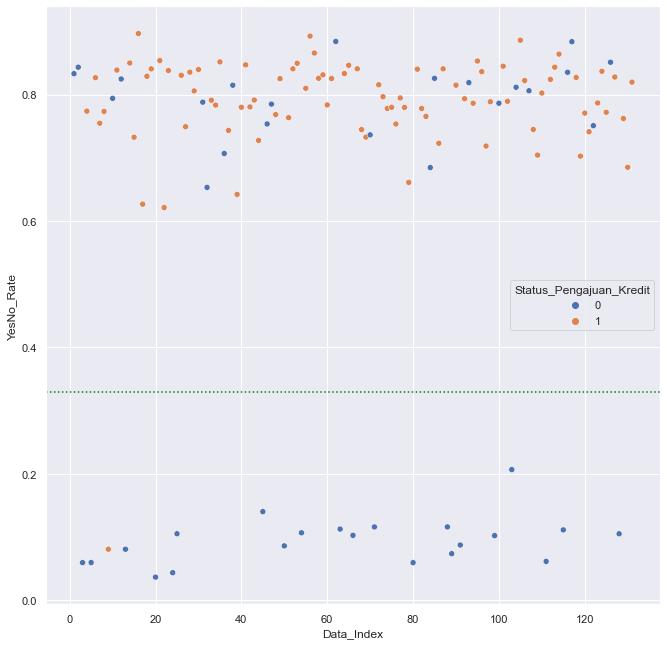

In [43]:
fig, ax = plt.subplots(figsize=(11, 11))
test['Data_Index'] = range(1, len(test) + 1)
sns.scatterplot(data=test, x='Data_Index', y='YesNo_Rate', hue='Status_Pengajuan_Kredit')
plt.axhline(y = 0.33, color ='green', linestyle =':')
plt.show()

In [44]:
cm_test = pd.crosstab(test['Status_Pengajuan_Kredit'], test['Prediction'])
cm_test

Prediction,0,1
Status_Pengajuan_Kredit,,
0,21,22
1,1,87


In [45]:
TN_test = cm_test.iloc[0, 0]
TP_test = cm_test.iloc[1, 1]
FN_test = cm_test.iloc[1, 0]
FP_test = cm_test.iloc[0, 1]

accuracy_test = (TN_test + TP_test) / (TN_test + FP_test + FN_test + TP_test)
sensitivity_test = TP_test / (TP_test + FN_test)
precision_test = TP_test / (TP_test + FP_test)

print('The model accuracy of testing data:', f'{accuracy_test: 0.2%}')
print('The model sensitivity of testing data:', f'{sensitivity_test: 0.2%}')
print('The model precision of testing data:', f'{precision_test: 0.2%}')

The model accuracy of testing data:  82.44%
The model sensitivity of testing data:  98.86%
The model precision of testing data:  79.82%


In [46]:
metrics = ['Accuracy', 'Sensitivity', 'Precision']
performance_train = [accuracy_train, sensitivity_train, precision_train]
performance_test = [accuracy_test, sensitivity_test, precision_test]
performance1 = pd.DataFrame({'Metrics': metrics, 'Training Data': performance_train, 'Testing Data': performance_test})
performance1.style.format({'Training Data':'{:,.2%}', 'Testing Data':'{:.2%}'})

,Metrics,Training Data,Testing Data
0,Accuracy,80.61%,82.44%
1,Sensitivity,97.74%,98.86%
2,Precision,78.72%,79.82%


Dari perbandingan akurasi, presisi, dan sensitivitas model di atas dapat dilihat bahwa model ini termasuk underfitting karena testing data memiliki nilai akurasi, sensitivity, dan precision yang lebih tinggi daripada training data

## Improve The Model Performance

## 1. Outlier Removal

In [47]:
df1 = df1.loc[df1['Penghasilan'] < 10000000, :]
df1.shape

(477, 10)